In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
import astropy.units as u 
from astropy.coordinates import SkyCoord
import regions
from regions import Regions

from spectral_cube import SpectralCube
import importlib as imp

import reproject

In [2]:
ls /orange/adamginsburg/jwst/cloudc/images/*perfilt*

/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f182m-merged-reproject-nodestreak_i2d-perfilt128.fits
/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f187n-merged-reproject-nodestreak_i2d-perfilt128.fits
/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f212n-merged-reproject-nodestreak_i2d-perfilt128.fits
/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d-perfilt64.fits
/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f410m-merged-nodestreak_i2d-perfilt64.fits
/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f466n-merged-nodestreak_i2d-perfilt64.fits


In [3]:
hdu_182 = fits.open('/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f182m-merged-reproject-nodestreak_i2d-perfilt128.fits')
hdu_187 = fits.open('/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f187n-merged-reproject-nodestreak_i2d-perfilt128.fits')
hdu_212 = fits.open('/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f212n-merged-reproject-nodestreak_i2d-perfilt128.fits')

hdu_405 = fits.open('/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d-perfilt64.fits')
hdu_410 = fits.open('/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f410m-merged-nodestreak_i2d-perfilt64.fits')
hdu_466 = fits.open('/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f466n-merged-nodestreak_i2d-perfilt64.fits')

In [7]:
arr_182, foot_182 = reproject.reproject_interp(hdu_182, hdu_410[0].header)
hdu_182 = fits.PrimaryHDU(data=arr_182, header=hdu_410[0].header)


In [8]:
arr_187, foot_187 = reproject.reproject_interp(hdu_187, hdu_410[0].header)
hdu_187 = fits.PrimaryHDU(data=arr_187, header=hdu_410[0].header)

In [ ]:
arr_212, foot_212 = reproject.reproject_interp(hdu_212, hdu_410[0].header)
hdu_212 = fits.PrimaryHDU(data=arr_212, header=hdu_410[0].header)

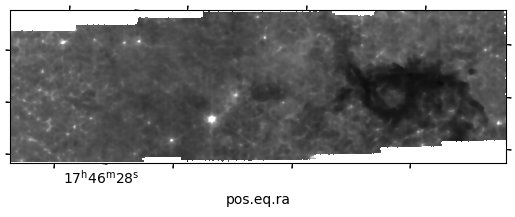

In [11]:
ax = plt.subplot(111, projection=WCS(hdu_182.header))
ax.imshow(hdu_182.data, cmap='Greys_r', vmin=0, vmax=15)

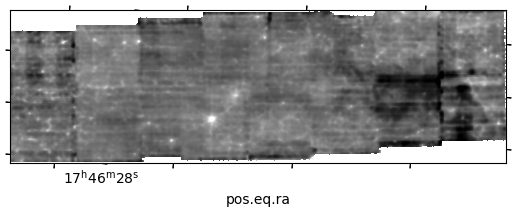

In [45]:
ax = plt.subplot(111, projection=WCS(hdu_187.header))
ax.imshow(hdu_187.data, cmap='Greys_r', vmin=-7, vmax=15)

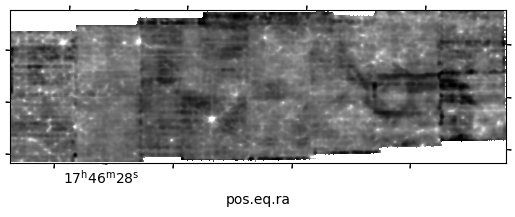

In [43]:
ax = plt.subplot(111, projection=WCS(hdu_212.header))
ax.imshow(hdu_212.data, cmap='Greys_r', vmin=-5, vmax=15)

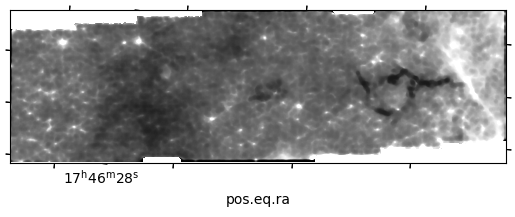

In [33]:
ax = plt.subplot(111, projection=WCS(hdu_405[0].header))
data_405 = hdu_405[0].data
data_405[data_405 == 0] = np.nan
ax.imshow(data_405, cmap='Greys_r', vmin=0, vmax=25)

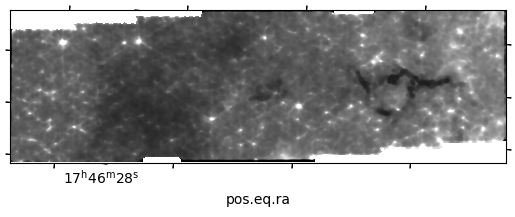

In [34]:
ax = plt.subplot(111, projection=WCS(hdu_410[0].header))
data_410 = hdu_410[0].data
data_410[data_410 == 0] = np.nan
ax.imshow(data_410, cmap='Greys_r', vmin=0, vmax=25)

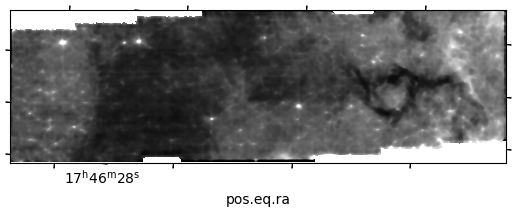

In [35]:
ax = plt.subplot(111, projection=WCS(hdu_466[0].header))
data_466 = hdu_466[0].data
data_466[data_466 == 0] = np.nan
ax.imshow(data_466, cmap='Greys_r', vmin=0, vmax=25)

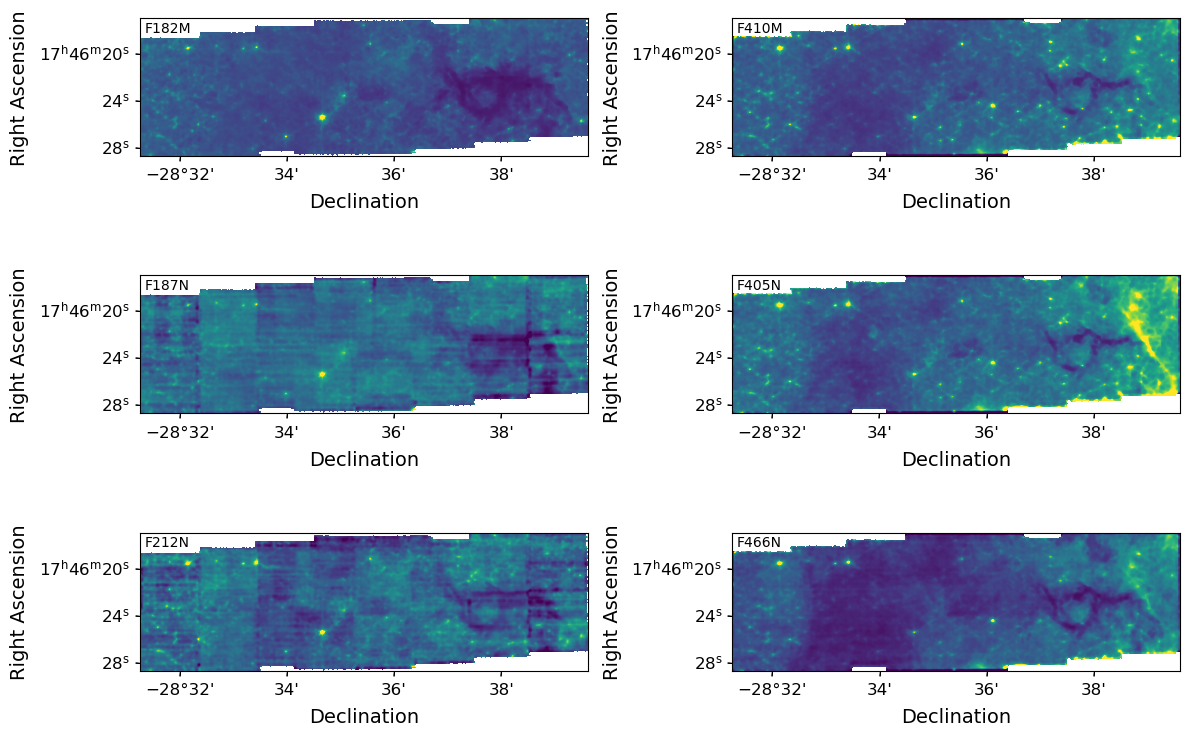

: 

In [ ]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(321, projection=WCS(hdu_182.header))
ax1.imshow(hdu_182.data, cmap='viridis', vmin=0, vmax=15)
ax1.text(0.01, 0.9, 'F182M', color='k', transform=ax1.transAxes)

ax2 = plt.subplot(323, projection=WCS(hdu_187.header))
ax2.imshow(hdu_187.data, cmap='viridis', vmin=-7, vmax=15)
ax2.text(0.01, 0.9, 'F187N', color='k', transform=ax2.transAxes)

ax3 = plt.subplot(325, projection=WCS(hdu_212.header))
ax3.imshow(hdu_212.data, cmap='viridis', vmin=-5, vmax=15)
ax3.text(0.01, 0.9, 'F212N', color='k', transform=ax3.transAxes)

ax4 = plt.subplot(324, projection=WCS(hdu_405[0].header))
ax4.imshow(data_405, cmap='viridis', vmin=0, vmax=25)
ax4.text(0.01, 0.9, 'F405N', color='k', transform=ax4.transAxes)

ax5 = plt.subplot(322, projection=WCS(hdu_410[0].header))
ax5.imshow(data_410, cmap='viridis', vmin=0, vmax=25)
ax5.text(0.01, 0.9, 'F410M', color='k', transform=ax5.transAxes)

ax6 = plt.subplot(326, projection=WCS(hdu_466[0].header))
ax6.imshow(data_466, cmap='viridis', vmin=0, vmax=25)
ax6.text(0.01, 0.9, 'F466N', color='k', transform=ax6.transAxes)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    dec = ax.coords[1]
    ra = ax.coords[0]

    dec.set_ticks_position('b')
    dec.set_ticklabel_position('b')
    dec.set_axislabel_position('b')
    dec.set_ticklabel(size=12)
    ra.set_ticks_position('l')
    ra.set_ticklabel_position('l')
    ra.set_axislabel_position('l')
    ra.set_ticklabel(size=12)

    ax.set_ylabel('Right Ascension', fontsize=14)
    ax.set_xlabel('Declination', fontsize=14)

plt.tight_layout()

plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/cloudc_perfilt.pdf', bbox_inches='tight')